In [1]:
import cv2

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
test_img_bgr = cv2.imread("D:\learning_desk\opencv\line_detection_sample.png")

In [6]:
test_img_rgb = cv2.cvtColor(test_img_bgr, cv2.COLOR_BGR2RGB)

In [7]:
test_img_gray = cv2.cvtColor(test_img_rgb, cv2.COLOR_RGB2GRAY)

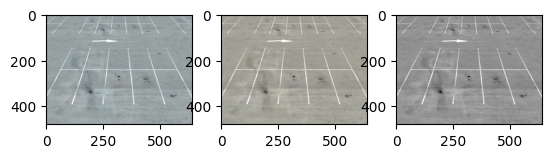

In [10]:
plt.subplot(131)
plt.imshow(test_img_bgr)
plt.subplot(132)
plt.imshow(test_img_rgb)
plt.subplot(133)
plt.imshow(test_img_gray, cmap='gray')

In [20]:
test_img_edges_50_150 = cv2.Canny(test_img_gray, 50, 150, apertureSize=3)
test_img_edges_50_200 = cv2.Canny(test_img_gray, 50, 200, apertureSize=3)
test_img_edges_100_200 = cv2.Canny(test_img_gray, 100, 200, apertureSize=3)

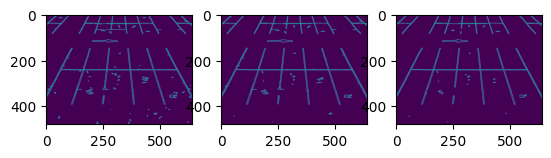

In [21]:
plt.subplot(131)
plt.imshow(test_img_edges_50_150)
plt.subplot(132)
plt.imshow(test_img_edges_50_200)
plt.subplot(133)
plt.imshow(test_img_edges_100_200)

In [22]:
test_img_lines = cv2.HoughLines(test_img_edges_100_200, 1, np.pi/180, 200)

In [25]:
test_img_lines[0]

array([[244.       ,   1.5707964]], dtype=float32)